# Laboratoire 2 : Arbre de désision, Bayes naïf et KNN
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | LEMARCHANT HUGO - LEMH03039705 * TAN ELODIE - TANE25619607 * JACQUES-SYLVAIN LECOINTRE LECJ19128301 |
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Automne 2018                                            |
| Groupe                | C                                                       |
| Numéro du laboratoire | 02                                                      |
| Professeur            | Prof. Hervé Lombaert                                    |
| Chargé de laboratoire | Pierre-Luc Delisle                                      |
| Date                  | 11/10/2018                                              |

In [39]:
# -*- coding:utf-8 -*-
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os, random
import math
import collections
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.ndimage as nd
import csv
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV

## Spam

In [4]:
df = pd.read_csv('spam.csv', delimiter = ',', header=None)
X_mail = df.loc[:, 0:56].values
Y_mail = df.loc[:, 57].values

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(X_mail, Y_mail, test_size=0.20, random_state=42, stratify=Y_mail)
df.groupby(57).count()[0].divide(df.shape[0])

57
0    0.599638
1    0.400362
Name: 0, dtype: float64

La répartition des données montre environ 60% de courriels 'non spam' et 40% de courriels 'spam' comme indiqué dans l'énoncé.

La repartition des classes (60% => 0 | 40% => 1) dans les ensembles de données est bien respectée comme demontré ci-dessous :

In [5]:
print('Repartition des donnees dans l\'emsemble d\'entrainement : {0}'.format(collections.Counter(Ym_train).most_common(2)))
print('Repartition des donnees dans l\'emsemble d\'test :{0}'.format(collections.Counter(Ym_test).most_common(2)))

Repartition des donnees dans l'emsemble d'entrainement : [(0, 1324), (1, 884)]
Repartition des donnees dans l'emsemble d'test :[(0, 331), (1, 221)]


### Arbres de décision

#### Max-depth : None , 3, 5, 10

In [6]:
accuracies = []
f1_scores = []

for depth in (None,3, 5, 10):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    accuracies.append(acc)
    f1_scores.append(f1)

### Arbres de décision - Accuracy & F1 Score

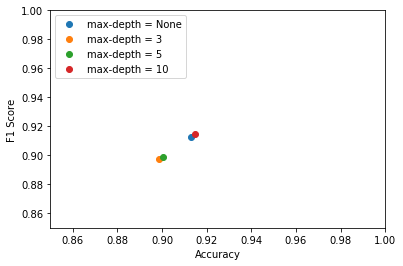

In [12]:
for i, label in zip(range(0, 4), (None, 3, 5, 10)):
    plt.plot(accuracies[i], f1_scores[i], "o", label='max-depth = {}'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend(loc='upper left')
plt.xlim([0.85, 1])
plt.ylim([0.85, 1])
plt.show()

### Arbres de décision - Cross validation

D'après le graphique des $Accuracy$ et $F1 scores$, on se rend compte que le meilleur hyperparamètre pour les arbres de décision pour Spam est `max-depth = 10`. La validation croisée sera donc effectuée avec l'hyperparamètre `max-depth = 10`.

In [13]:
K = 10
for md in [5,10]:
    clf = tree.DecisionTreeClassifier(max_depth = md)
    scores = cross_val_score(clf, X_mail, Y_mail, cv= K)
    print('max_depth : {0}, F1 score: {1}'.format(md,sum(scores)/K))

max_depth : 5, F1 score: 0.9068710206760748
max_depth : 10, F1 score: 0.917018706924844


### KNN 
#### K = 3, 5, 10, Poids = 'uniform' & Poids = 'distance'

In [408]:
accuracies_uniform = []
f1_scores_uniform = []

accuracies_distance = []
f1_scores_distance = []

In [409]:
for n_neigh in (3, 5, 10):
    clf = KNeighborsClassifier(n_neighbors = n_neigh, weights='uniform')

    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    accuracies_uniform.append(acc)
    f1_scores_uniform.append(f1)


    clf = KNeighborsClassifier(n_neighbors = n_neigh, weights='distance')
    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    accuracies_distance.append(acc)
    f1_scores_distance.append(f1)

### KNN - Accuracy & F1 Scores

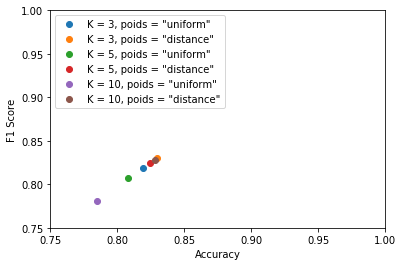

In [438]:
for i, label in zip(range(0, 3), (3, 5, 10)):
    plt.plot(accuracies_uniform[i], f1_scores_uniform[i], "o", label='K = {}, poids = "uniform"'.format(label))
    plt.plot(accuracies_distance[i], f1_scores_distance[i], "o", label='K = {}, poids = "distance"'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend(loc='upper left')
plt.xlim([0.75, 1])
plt.ylim([0.75, 1])
plt.show()

### KNN - Cross-validation

D'après le graphique des Accuracy et F1 scores, on se rend compte que l'hyperparamètre `K` pour Spam est `K = 3` La validation croisée sera donc effectuée avec l'hyperparamètre `K=3` et `poids = distance`.

In [435]:
K = 10
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(clf, X_mail, Y_mail, cv= K)
print(sum(scores)/K)

0.8029222185756482


### Bayes Naive
#### Distribution Gaussienne

##### Hold-out validation

In [414]:
clf = GaussianNB()
clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc_gauss = accuracy_score(Ym_test, Y_pred)
f1_gauss = f1_score(Ym_test, Y_pred, average='weighted') 

print("Précision : {}".format(acc_gauss))
print("Score F1 : {}".format(f1_gauss))

Précision : 0.8387681159420289
Score F1 : 0.8402037805334562


##### 10-fold cross validation

In [415]:
K = 10
clf = GaussianNB()
scores = cross_val_score(clf, X_mail, Y_mail, cv=K)
print(sum(scores)/K)

0.8122848703642929


#### Distribution  Multinomiale

#### Validation hold-out

In [54]:
est = KBinsDiscretizer(n_bins = 10, encode='ordinal')
est.fit(X_mail) 
Xt_mail = est.transform(X_mail)

scaler = preprocessing.MinMaxScaler()
Xm_scaled = scaler.fit_transform(Xt_mail)

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm_scaled, Y_mail, test_size=0.20, random_state=42, stratify=Y_mail)

clf = MultinomialNB()
clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc_multi = accuracy_score(Ym_test, Y_pred)
f1_multi = f1_score(Ym_test, Y_pred, average='weighted') 

print("Précision : {}".format(acc_multi))
print("Score F1 : {}".format(f1_multi))


Précision : 0.907608695652174
Score F1 : 0.9081476031094811


##### Validation croisée

In [60]:
K = 10
clf = MultinomialNB()
scores = cross_val_score(clf, Xm_scaled, Y_mail, cv= K)
print(sum(scores)/K)

0.8804200853298326


### Forêts aléatoires (random forest)

In [16]:
param_grid = {
    'max_depth': [3,5,10,20,30,40,50,100],
    'n_estimators': [10,20,30,40,50,100,200,300]
}

grid_search = GridSearchCV(estimator =  RandomForestClassifier(), param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)
grid_search.fit(Xm_train, Ym_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 100, 200, 300], 'max_depth': [3, 5, 10, 20, 30, 40, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [17]:
clf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],max_depth=grid_search.best_params_['max_depth'])
clf.fit(Xm_train,Ym_train)
Y_pred = clf.predict(Xm_test)
acc_multi = accuracy_score(Ym_test, Y_pred)
f1_multi = f1_score(Ym_test, Y_pred, average='weighted') 
print("Précision : {}".format(acc_multi))
print("Score F1 : {}".format(f1_multi))

Précision : 0.9583333333333334
Score F1 : 0.9582160713365291


**Validation croisée pour les forêts aléatoires**

In [18]:
scores = cross_val_score(clf, Xm_test, Ym_test, cv= K)
print(sum(scores)/K)

0.9275917065390749


## Analyse de galaxies

Nous n'avons pas utilisé la recherche par grille pour les données Spam, mais nous allons l'utiliser ici pour définir les meilleurs hyperparamètres pour l'algorithme des K-plus proches voisins. Nous aurions pu l'utiliser dans les cas précédents mais cela ne change rien en terme de résultats purs.

In [84]:
feature_vectors = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None)
labels = pd.read_csv('galaxy_label_data_set.csv', delimiter = ',')
X_galaxy = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None).values[:,0:-1]
Y_galaxy = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None).values[:,-1:].astype(int).flatten()
Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(X_galaxy, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

**Nous utilisons les caractéristiques du TP1 dans le vecteur d'entrée, combinées aux caractéristiques de galaxy_feature_vectors données par le TP2. (qu'est ce qui garantit que l'ordre des observations de galaxy_feature_vectors.csv soit le même que celles du TP1 ? )**

In [85]:
X_galaxy_TP1 = pd.read_csv('vectors_TP1.csv', delimiter = ',').values[:,0:2]
# utilisons uniquement circularite et aspect ratio ratio
X_galaxy_TP1_1= np.concatenate([X_galaxy,X_galaxy_TP1[:,0:2]],axis=1)
Xgtp1_train, Xgtp1_test, Ygtp1_train, Ygtp1_test = train_test_split(X_galaxy_TP1_1, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

Nous observons une incohérence dans les classes de sortie entre `galaxy_feature_vectors.csv` et `galaxy_label_data_set.csv` comme montré ci-dessous :

In [79]:
print("galaxy_feature_vectors")
print(pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None)[75].head(6))

print("galaxy_label_data_set")
print(labels.head(6)) 

galaxy_feature_vectors
0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
5    1.0
Name: 75, dtype: float64
galaxy_label_data_set
       id   class
0  100090  smooth
1  100134  spiral
2  100322  spiral
3  100380  spiral
4  100458  smooth
5  100479  smooth


En effet, dans `galaxy_feature_vectors`, la classe 1 correspond à $smooth$ alors que la classe 0 correspond à $spiral$. Cependant, dans `galaxy_label_data_set`, les classes ne correspondent pas à `galaxy_feature_vectors`. Nous avons donc choisi de ne pas utiliser nos primitives trouvées dans le TP1 dans nos analyses.

### KNN 

In [33]:
galaxy_accuracies_uniform = []
galaxy_f1_scores_uniform = []

galaxy_accuracies_distance = []
galaxy_f1_scores_distance = []

In [34]:
parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[3, 5, 10]}

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters, cv=10)
clf.fit(X_galaxy, Y_galaxy)

print(clf.best_params_)

{'n_neighbors': 10, 'weights': 'distance'}


#### K = 3, 5, 10, Poids = 'uniform' & Poids = 'distance'

In [72]:
for n_neigh in (3, 5, 10):

    clf = KNeighborsClassifier(n_neighbors=n_neigh, weights='uniform')

    clf = clf.fit(Xg_train, Yg_train)
    Y_pred = clf.predict(Xg_test)

    acc = accuracy_score(Yg_test, Y_pred)
    f1 = f1_score(Yg_test, Y_pred, average='weighted') 

    galaxy_accuracies_uniform.append(acc)
    galaxy_f1_scores_uniform.append(f1)


    clf = KNeighborsClassifier(n_neighbors=n_neigh, weights='distance')
    clf = clf.fit(Xg_train, Yg_train)
    Y_pred = clf.predict(Xg_test)

    acc = accuracy_score(Yg_test, Y_pred)
    f1 = f1_score(Yg_test, Y_pred, average='weighted') 

    galaxy_accuracies_distance.append(acc)
    galaxy_f1_scores_distance.append(f1)

#### KNN - Accuracy & F1 Scores

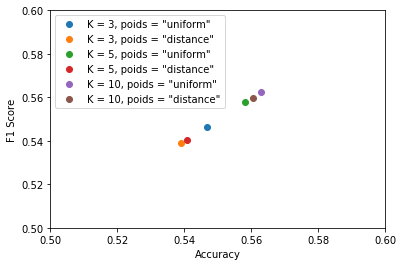

In [73]:
for i, label in zip(range(0, 3), (3, 5, 10)):
    plt.plot(galaxy_accuracies_uniform[i], galaxy_f1_scores_uniform[i], "o", label='K = {}, poids = "uniform"'.format(label))
    plt.plot(galaxy_accuracies_distance[i], galaxy_f1_scores_distance[i], "o", label='K = {}, poids = "distance"'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend(loc='upper left')
plt.xlim([0.5, 0.6])
plt.ylim([0.5, 0.6])
plt.show()

#### KNN - Cross-validation
Les meilleurs hyperparamètres renvoyés par `Grid Search` sont `K = 10` et `poids = distance`. Cependant, lorsque nous exécutons les différentes commandes sans passer par la fonction, nous obtenons de meilleurs résultats lorsque `K = 10` et que le `poids = uniforme`. Nous allons donc faire la validation croisée avec les deux hyperparamètres.

In [37]:
nfold = 10
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
scores = cross_val_score(clf, X_galaxy, Y_galaxy, cv=nfold)
print (scores)
print(sum(scores)/nfold)

[0.58865248 0.57446809 0.57362507 0.54405677 0.56771141 0.56002365
 0.5556213  0.58047337 0.5556213  0.57159763]
0.5671851089912532


In [38]:
nfold = 10
clf = KNeighborsClassifier(n_neighbors=10, weights='distance')
scores = cross_val_score(clf, X_galaxy, Y_galaxy, cv=nfold)
print (scores)
print(sum(scores)/nfold)

[0.58510638 0.57269504 0.56357185 0.5487877  0.56830278 0.5505618
 0.57159763 0.57928994 0.56331361 0.5704142 ]
0.5673640930790169


Nous remarquons que la validation croisée pour `K = 10` et `poids = distance` donne, quoique d'une différence très minime, un meilleur résultat. Nous pouvons donc dire que l'utilisation de `Grid Search` pour la recherche des meilleurs hyperparamètres est tout de même meilleure qu'une recherche faite "soi-même" dans ce cas là.

In [282]:
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf = clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)
CM = confusion_matrix(Y_pred, Yg_test)

print(classification_report(Y_pred,Yg_test))
print(CM)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1731
           1       0.89      0.94      0.91      1651

   micro avg       0.91      0.91      0.91      3382
   macro avg       0.91      0.91      0.91      3382
weighted avg       0.91      0.91      0.91      3382

[[1532  199]
 [  95 1556]]


# Expliquer

### Bayes
#### Loi Gaussienne (normale)

In [210]:
clf = GaussianNB()
clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)

acc_gauss = accuracy_score(Yg_test, Y_pred)
f1_gauss = f1_score(Yg_test, Y_pred, average='weighted') 

print("Précision : {}".format(acc_gauss))
print("Score F1 : {}".format(f1_gauss))

Précision : 0.6088113542282673
Score F1 : 0.5562405046055754


#### Loi Multinomiale

In [86]:
est = KBinsDiscretizer(n_bins = 10, encode='ordinal')
est.fit(X_galaxy) 
Xt_galaxy = est.transform(X_galaxy)

scaler = preprocessing.MinMaxScaler()
Xg_scaled = scaler.fit_transform(Xt_galaxy)

Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(Xg_scaled, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

*Recherche de l'hyperparamètre $alpha$ pour la loi multinomiale*

In [87]:
NBParamGrid = dict(alpha=np.linspace(0,2,20)[1:])
paramsearch = GridSearchCV(estimator=MultinomialNB(), param_grid=NBParamGrid, n_jobs=6,cv=10)
paramsearch.fit(Xg_train, Yg_train)
selected_alpha = paramsearch.best_estimator_.alpha
print(selected_alpha)

1.1578947368421053


La meilleure valeur de alpha est 1.158 d'après `Grid Search` et sera utilisée par la suite pour la validation.

#### Bayes - Loi multinomiale - avec validation hold-out

In [88]:
clf = MultinomialNB(alpha=selected_alpha)
clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)

acc_multi = accuracy_score(Yg_test, Y_pred)
f1_multi = f1_score(Yg_test, Y_pred, average='weighted') 

print("Précision : {}".format(acc_multi))
print("Score F1 : {}".format(f1_multi))

Précision : 0.7965700768775872
Score F1 : 0.7965745650692521


On remarque que l'utilisation de la loi multinomiale avec les hyperparamètres `MinMaxScaler` et `K-Bins discretization` donne une meilleure précision et score F1. Nous allons donc les utiliser pour la validation croisée.

#### Bayes - Loi multinomiale - avec validation croisee

In [89]:
K = 10
clf = MultinomialNB(alpha=selected_alpha)
scores = cross_val_score(clf, Xg_scaled, Y_galaxy, cv= K)
print(sum(scores)/K)

0.8009194601819851


Nous allons maintenant effectuer le test de classification pour la loi multinomiale avec les primitives calculées dans le TP1, ajoutées aux autres primitives données dans le TP2. En effet, puisque nous avons trouvé une incohérence dans les deux datasets précédemment, nous avons préféré ne pas utiliser au début de nos analyses ces données.

In [90]:
K = 10
clf = MultinomialNB(alpha=selected_alpha)
XgTP1_scaled = scaler.fit_transform(X_galaxy_TP1_1)
scores = cross_val_score(clf, XgTP1_scaled, Y_galaxy, cv= K)
print(sum(scores)/K)

0.7943571144847276


Lien utile : http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

## Question 1
### Méthode de création des ensembles de données
Nous avons essentiellement utilisé les méthodes de la librairie Scikitlearn pour créer nos ensembles de données. Nous utilisons train_test_split pour entrainer des algorithmes avec des validations en holdout, et cross_val_score pour des entrainements avec K fold cross validation. Cette librairie nous offre des moyens simples d'utilisation pour générer des ensembles de tailles pré-déterminée et mélangés pour simuler des conditions au plus proche d'un cas d'utilisation réelle compte tenu de nos données.

## Question 1
### Détails des ensembles produits


## Question 2
### Approche de validation proposée et justification
Nous avons choisi de pratiquer des K fold cross validations pour valider la totalité de nos apprentissages car nous pensons que c'est le meilleur compromis parmi K flod CV, leave one out, leave P out et holdout. En effet il nous permet de tester suffisamment de cas de figures d'entrainements pour être confiant sur l'apprentissage suffisamment général par rapport à holdout mais sans pour autant être aussi gourmand en ressources que leave one out ou leave P out.

## Question 3
### Matrice des expérimentations

|Données|Pourriels|Galaxies|
|-------|---------|--------|
|Arbre de décision d=3|Acc = 0.8983, F1 = 0.8975|None|
|Arbre de décision d=5|Acc = 0.9000, F1 = 0.8990|None|
|Arbre de décision d=10|Acc = 0.9155, F1 = 0.9145|None|
|Arbre de décision d=inf|Acc = 0.9133, F1 = 0.9130|None|
|Arbre de décision 10-CV|0.9098|None|
|3-NN Uniform|Acc = 0.82, F1 = 0.82|Acc = 0.4982, F1 = 0.4981|
|3-NN Distance|Acc = 0.83, F1 = 0.83|Acc = 0.5023, F1 = 0.5023|
|5-NN Uniform|Acc = 0.809, F1 = 0.809|Acc = 0.5127, F1 = 0.5126|
|5-NN Distance|Acc = 0.825, F1 = 0.825|Acc = 0.4985, F1 = 0.4986|
|10-NN Uniform|Acc = 0.783, F1 = 0.782|Acc = 0.4943, F1 = 0.4915|
|10-NN Distance|Acc = 0.828, F1 = 0.828|Acc = 0.4943, F1 = 0.4941|
|3-NN Distance 10-CV|0.8029|0.5044|
|Bayes Gaussian|Acc = 0.826, F1 = 0.828|Acc = 0.5147, F1 = 0.4504|
|Bayes Multinomial|Acc = 0.9094, F1 = 0.9076|Acc = 0.9094, F1 = 0.9076|
|Bayes Multinomial 10-CV|0.0898|0.8981|



### Etude des hyperparamètres

#### Arbres de décision  
D'après nos données,ne pas limiter la profondeur de l'abre créee un sur-apprentissage,il est donc préférable de limiter celle-ci.Pour les 3 valeurs testées ,plus la profondeur de l'arbre est élevée, plus la précision et les scores F1 sont élevés.
Le gain d'information et donc la pureté de nos ensembles de données s'améliore en augmentant cette profondeur.Dans le cas des données de spams,Une profondeur de 10 ne semble pas causer de sur-apprentissage et permet d'obtenir les meilleurs résultats avec un F1 score de 0.9185.Cependant avec une prodondeur de 5 le F1 score est assez proche 0.90759 et dependemment de l'application que l'on souhaite mettre en place il faudra prendre en compte la complexité de le l'arbre et une profondeur de 5 semble etre un bon compromis complexité/performance.

#### KNN  
`poids = uniform` veut dire que la pondération de chaque voisin est uniforme et ne dépend pas de la distance au point.
L'option `poids = distance` pondère différement chaque voisin pour la décision de l'algorithme KNN.Cette pondération est inversement proportionnelle a la distance au point a classifier.
La distance utilisee est celle par defaut donc ‘minkowski’ avec p=2 ce qui equivaut a la distance Euclidienne.

Dans le cas des spams, les meilleurs hyperparamètres sont : `nombre de voisins = 3` et `poids = distance`. Nous pouvons expliquer cela par le fait que lorsque k est trop grand,le biais est important et on risque un sous-apprentissage.K=3 semble etre un bon compromis biais/variance sans introduire de sur-apprentissage. La performance de cet algorithme est egalement a prendre en compte car la pondération par distance introduit de la lenteur dans l'exécution O(nd+nk).

De plus, nous pouvons remarquer que lorsque l'hyperparamètre du poids est égal à $distance$, les résultats sont significativement meilleurs. En effet, les voisins les plus proches aideront à mieux discriminer le point étudié.

Dans la Classification des Galaxies et donc des images , K=10 uniforme permet d'obtenir les meilleurs resultats de score F1 (0.567) mais ce modele ne semble pas adapté a ce jeu de données.

#### Bayes 

Deux hypothèses de distributions ont été etudiées dans ce travail ,la loi normale et la distribution  multinomiale.Pour cette dernière,il s'agit d'une généralistion de la loi de Bernouilli (succès de n épreuves) pour des variables de nature catégorielle (discrètes) comme c'est le cas pour le spam ou les galaxies.

L'imppact de l'hyperparamètre alpha a été évalue pour cette distribution pour la classifiaction de galaxies.alpha est un hyperparamètre de lissage pour les variables catégorielles.


Le meilleur résultat pour l'algorithme de Bayes naïf est lorsque celui-ci la distribution est multinomiale, avec les hyperparamètres `MinMaxScaler` et la `K-Bins discretization`.   

D'après la définition de Scikit-learn, `MinMaxScaler` transforme les primitives () en les mettant à l'échelle entre 0 et 1. Cela permet de minimiser les différences d'échelle entre les différents attributs. (Ex : un attribut entre 0 et 1000 et un attribut entre 0 et 1).

`KBinsDiscretizer` permet de discrétiser les attributs continus que nous avons en entrée. Cela permet de réduire les différences entre les différentes valeurs que peut prendre l'attribut, ce qui permet de mieux les regrouper entre eux.

#### forêts aléatoires (random forest)

Les hyperparamètres pour le modele random forest ont été determinés avec une recherche par grille.La profondeur des arbres (max_depth) est un hyperparamètre a considerer ainsi que le nombre d'arbres (n_estimators).La profondeur maximale utilisée est 20 avec 30 arbres.

## Question 4
### Impact de la taille des ensembles de données sur la performance de classification

D'après nos différentes analyses, les ensembles de données qui se démarquent le mieux sont ceux sont les attributs sont discrétisés. En effet, comme expliqué précédemment, cela permet de regrouper un ensemble de valeurs différentes ensemble. Pour ce qui est de la taille des ensembles de données, nous avons beaucoup moins d'exemples pour les spams que pour les galaxies. Cependant, le cas des spams donne des erreurs beaucoup plus faibles que le cas des galaxies. Nous pouvons expliquer cela par le fait que les primitives de Spam sont plus discriminantes que celles des galaxies. Nous pouvons donc déduire de ces exemples que la taille des ensembles des données n'aide pas forcément à une meilleure classification des données. En effet, la qualité des primitives joue un rôle principal dans les classifications. Cependant, lorsque les privitives discriminent bien les données, il est évident qu'un nombre plus important d'exemples d'apprentissage va favoriser une meilleure classification des données.

## Question 5
### Impact du bruit dans les ensembles de données sur la performance de classification

Les courriels se pretent bien a un classiffieur de type arbre de decision ou encore mieux forets aleatoires.Naive Bayes avec une distribution multinomiale est egalement un bon classificateur.Cette distribution discrete se prete bien a ces donnees.

## Question 6
### Discussion sur la nature des données

Les données `Spam` sont extraites de différents mails, qui sont eux même composés d'une série de mots. Les données `Galaxy` sont quant à elles des images. Il est clairement plus difficile d'extraire de bonnes primitives sur des images que sur un texte simple. En effet, il faut tout d'abord effectuer plusieurs pré-traitements sur les images pour pouvoir extraire des données qui ne sont pas complètement sûres, par rapport à un nombre d'enchainement de mots écrits en majuscule dans un texte par exemple.  
C'est pourquoi nous arrivons mieux à classifier les mails en Spam que les différents types de galaxies.

## Question 7
### Recommandations

## Question 8
### Améliorations possibles